In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

In [9]:
df=pd.read_excel("train_agriculture.xlsx")
df_test=pd.read_excel("test_agriculture.xlsx")
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [11]:
df.info()
#There are Null Values in the dataset with "Number_Weeks_used"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [54]:
df.drop(["ID"],axis=1,inplace=True)
df_test.drop(["ID"],axis=1,inplace=True)

In [14]:
for col in ["Crop_Type","Soil_Type","Pesticide_Use_Category","Season","Crop_Damage"]:
    print("No of Unique values in "+col,len(df[col].unique()))
    print("Column Name "+col,df[col].unique(),end='\n\n\n')
#Following are the catagorical variables in the data 

No of Unique values in Crop_Type 2
Column Name Crop_Type [1 0]


No of Unique values in Soil_Type 2
Column Name Soil_Type [0 1]


No of Unique values in Pesticide_Use_Category 3
Column Name Pesticide_Use_Category [1 3 2]


No of Unique values in Season 3
Column Name Season [1 2 3]


No of Unique values in Crop_Damage 3
Column Name Crop_Damage [0 1 2]




In [17]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [18]:
df_test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


In [19]:
#Replacing Nan Values with Mean
#Train Data 
for column in ["Number_Weeks_Used"]:
    df[column].fillna(df[column].mean(), inplace=True)

#Test Data    
for column in ["Number_Weeks_Used"]:
    df_test[column].fillna(df_test[column].mean(), inplace=True)  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B77E8905B0>,
      dtype=object)

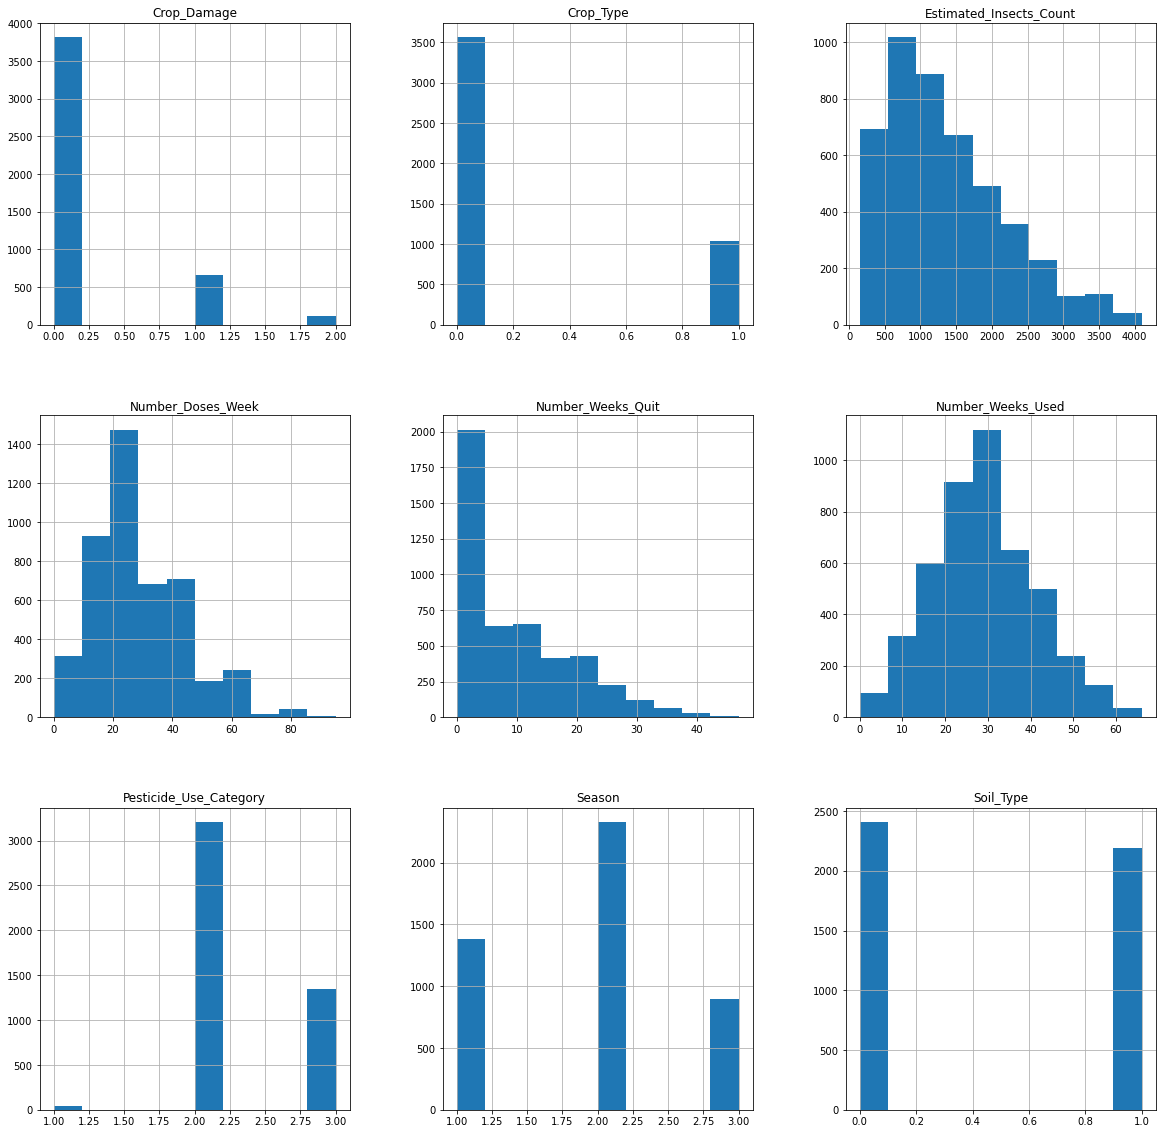

In [21]:
df.hist(figsize=(20,20))

In [ ]:
The data available on the Crop_Damage has 3 Catagories 
0-Alive 
1-Damaged due to Other Reasons 
2- Damaged due to Pesticides

Pesticide_Use_Catagory has 3 Catagories where 2nd type of pesticide has been used the most followed by 3rd catagory


0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

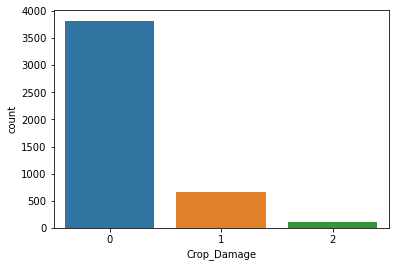

In [122]:
sns.countplot(x="Crop_Damage",data=df)
df["Crop_Damage"].value_counts()

In [123]:
df["Crop_Type"].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

<Figure size 800x640 with 0 Axes>

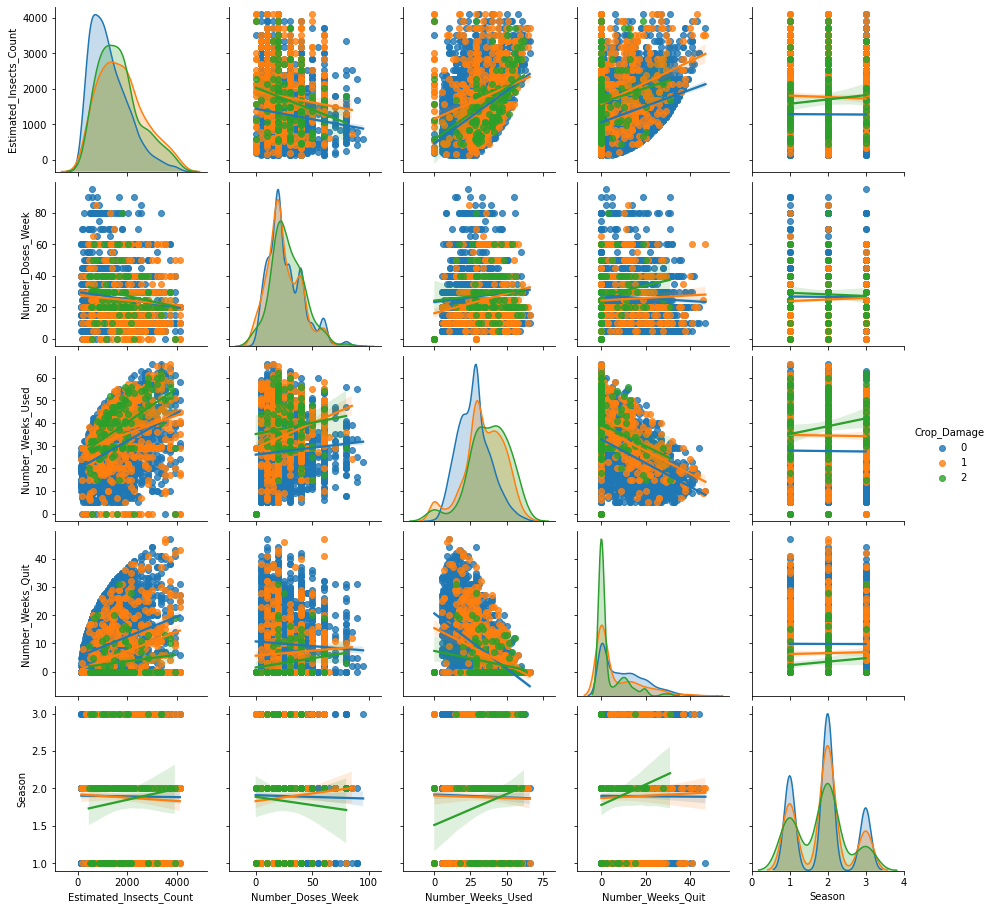

In [29]:
load=df.drop(["Crop_Type","Soil_Type","Pesticide_Use_Category"],axis=1)

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(load, kind="reg", hue="Crop_Damage")
plt.show()

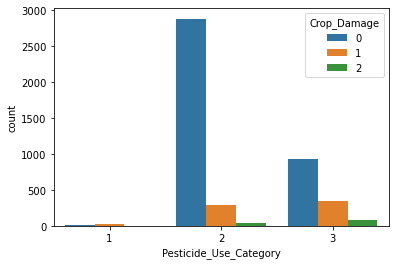

In [38]:
sns.countplot(x="Pesticide_Use_Category",hue="Crop_Damage", data=df)

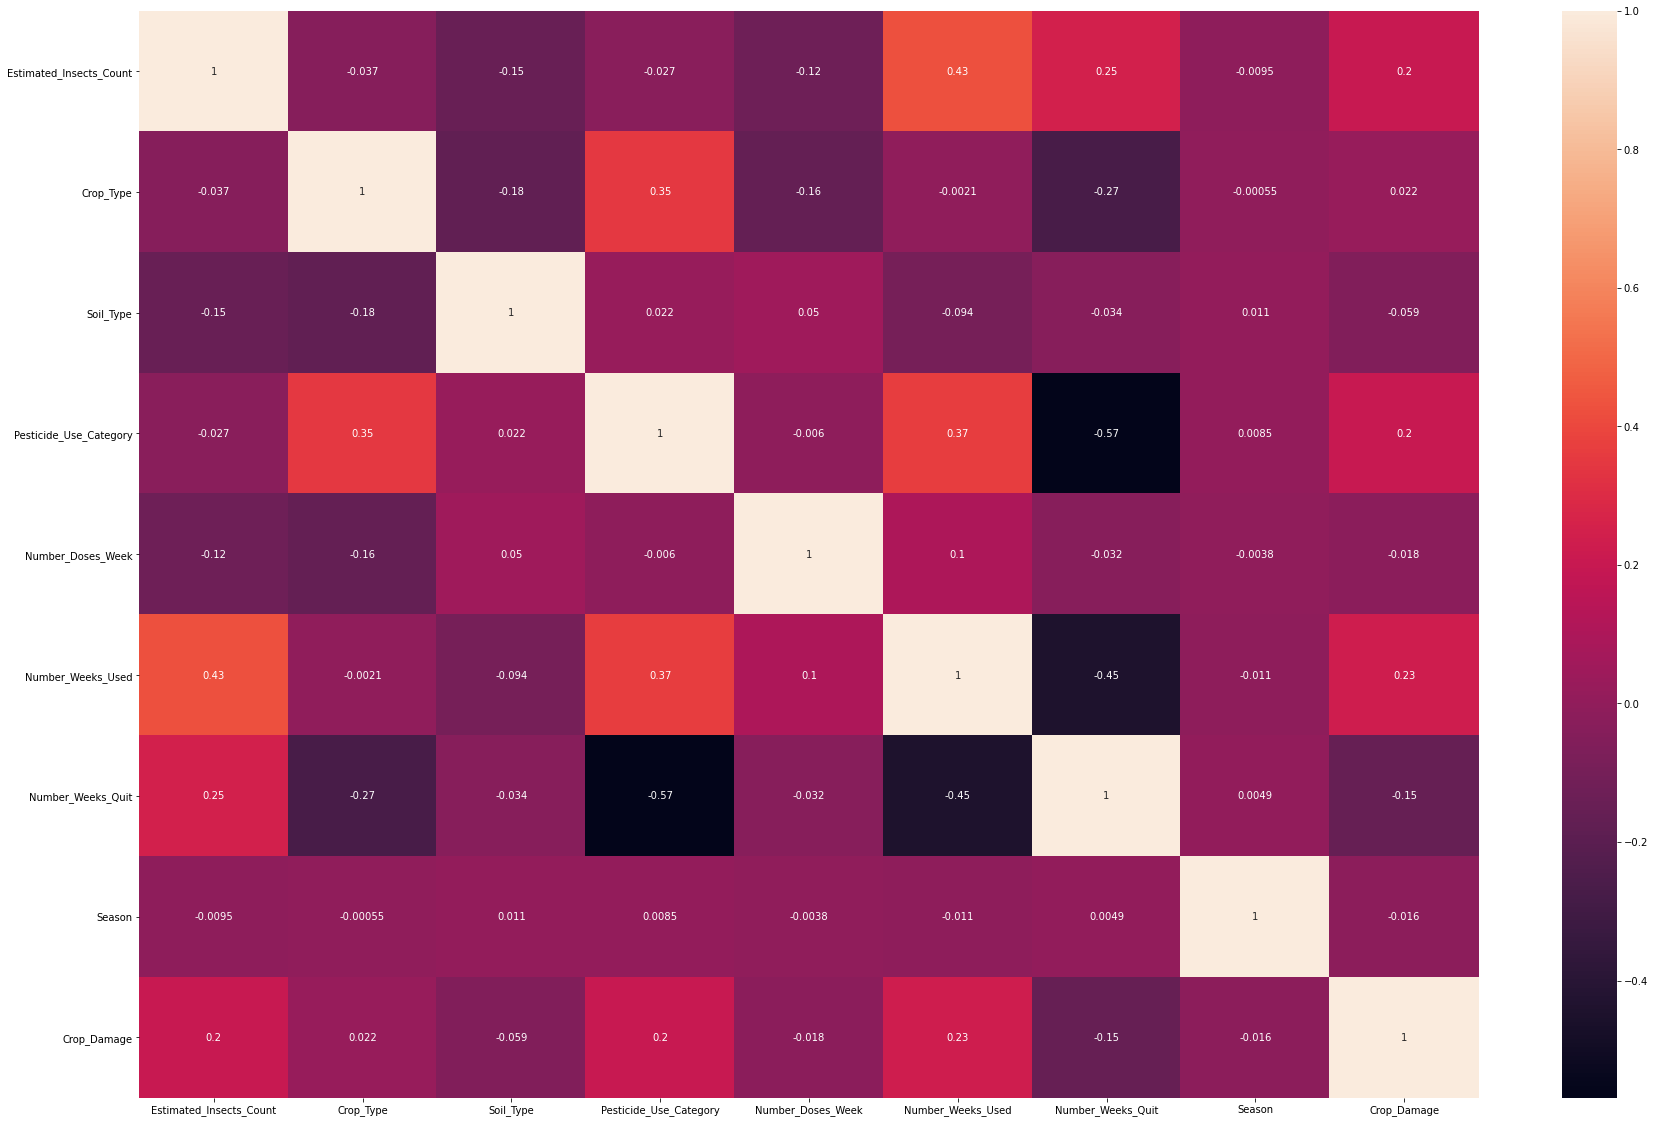

In [22]:
corr_hmap= df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

#Crop_Damage(Target): Has a decent Correlation with "Estimated_Insects_Count","Pesticide_Use_Category","Number_Weeks_Used"
#We can observe there is positive Correlation between "Number_Weeks_Used" and "Estimated_Insects_Count" indicating as the number of weeks incerase the insect count also increases   
#Pesticide_Use_Category also have correlation with Number_Weeks_Used and Crop_Type  

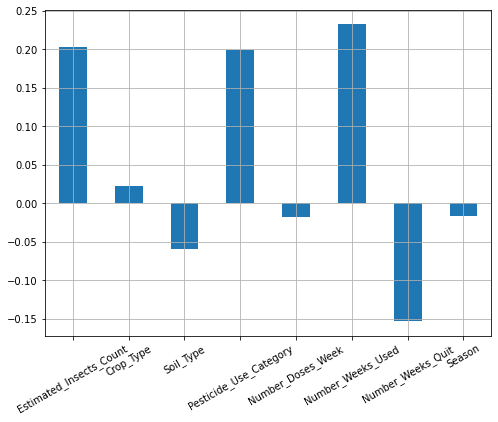

In [33]:
plt.figure(figsize=(8,6))
df.drop("Crop_Damage",axis=1).corrwith(df["Crop_Damage"]).plot(kind="bar",grid=True)
plt.xticks(rotation=30)
plt.show()

Variables are Correlated as Follows 

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Crop_Type                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Soil_Type                   AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Pesticide_Use_Category     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Number_Doses_Week          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Number_Weeks_Used                AxesSubplot(0.125,0.125;0.133621x0.343182)
Number_Weeks_Quit             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Season                         AxesSubplot(0.44569,0.125;0.133621x0.343182)
Crop_Damage                   AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

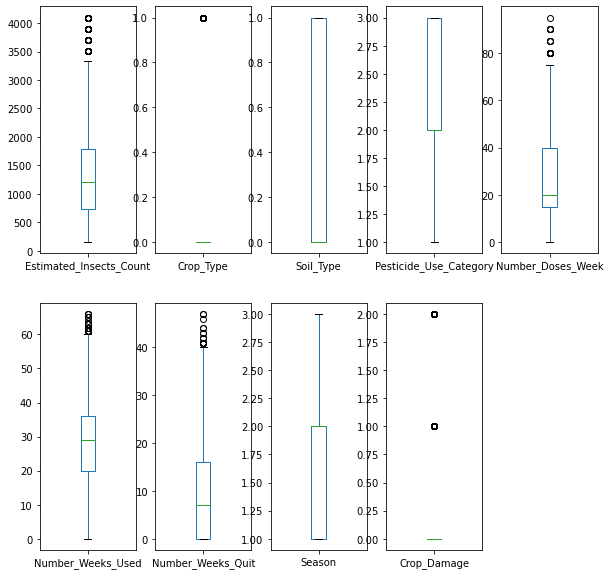

In [47]:
df.plot(kind="box",subplots=True,layout=(2,5),figsize=(10,10))

In [48]:
df.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [102]:
#Let us try to remove Skewness and check the results 

In [90]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
print("\n Original Shape", df.shape, "New Shape",df_new.shape)

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

In [91]:
Percntage_loss=((4599-4370)/4599)*100
print("\nPercentage loss:",Percntage_loss)


Percentage loss: 4.979343335507719


In [92]:
df_new.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

Crop_Damage    AxesSubplot(0.125,0.536818;0.133621x0.343182)
dtype: object

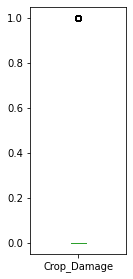

In [101]:
df_new["Crop_Damage"].plot(kind="box",subplots=True,layout=(2,5),figsize=(10,10))
#We are Loosing a Target Variable("2") Which is not what we are looking for so the model has to be built with Skewness 

In [82]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier

In [55]:
y=df["Crop_Damage"]
x=df.drop("Crop_Damage", axis=1)
print("\n X Shape", x.shape, "Y Shape",y.shape)


 X Shape (4599, 8) Y Shape (4599,)


In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [58]:
max_scr=0
for i in range(30,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,2)==round(accuracy_score(y_test,pred_test)*100,2):
    #if accuracy_score(y_train,pred_train)*100>max_scr:  
        max_scr=accuracy_score(y_train,pred_train)*100
        print("At random state",i,"The model Perfomes very well")
        print("Training accuracy_score is:",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is:",accuracy_score(y_test,pred_test), end = "\n\n\n")

At random state 918 The model Perfomes very well
Training accuracy_score is: 82.38651807556401
Testing accuracy_score is: 0.8239130434782609




In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.20,random_state=918)
num_folds = 10
seed = 918
scoring = 'accuracy'

In [83]:
models= [
    ("SVC",SVC()),
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("KNearest Neighbors",KNeighborsClassifier(3)),
    ]

In [84]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVC: 0.834741 (0.018986)
Logistic Regression: 0.823050 (0.018118)
Decision Tree: 0.733617 (0.022155)
Naive Bayes: 0.811905 (0.019175)
KNearest Neighbors: 0.800489 (0.019027)


#Model as has perfomed best with SVC: 0.834741 (0.018986) and Logistic Regression: 0.823050 (0.018118)
#we can go ahead with Hyper Parameter Tuning

# HyperParameter Tyning

In [64]:
#Parameter of Scaling Logistic Regression

c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(C=c_values, solver=['newton-cg', 'lbfgs', 'liblinear'],penalty=['l2'])
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.825498 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
#6 0.823050 (0.018118) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
#6 0.823050 (0.018118) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
#6 0.823050 (0.018118) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
#6 0.823050 (0.018118) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
#6 0.823050 (0.018118) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
#6 0.823050 (0.018118) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
#6 0.823050 (0.018118) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
#6 0.823050 (0.018118) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
#6 0.823050 (0.018118) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
#4 0.823322 (0.018343) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
#4 0.823322 (0.018343) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
#15 0.822779 (0.018614) with: {'C': 0.1, 'penalty': 'l2', 'solver'

In [85]:
#Scaling with SVC

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
param_grid = dict(C=c_values, kernel=['linear', 'poly', 'rbf'])
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.836103 using {'C': 0.5, 'kernel': 'rbf'}
#20 0.830122 (0.021744) with: {'C': 0.1, 'kernel': 'linear'}
#5 0.835831 (0.020263) with: {'C': 0.1, 'kernel': 'poly'}
#20 0.830122 (0.021744) with: {'C': 0.1, 'kernel': 'rbf'}
#20 0.830122 (0.021744) with: {'C': 0.3, 'kernel': 'linear'}
#2 0.836102 (0.020079) with: {'C': 0.3, 'kernel': 'poly'}
#6 0.835830 (0.019825) with: {'C': 0.3, 'kernel': 'rbf'}
#20 0.830122 (0.021744) with: {'C': 0.5, 'kernel': 'linear'}
#13 0.835559 (0.020159) with: {'C': 0.5, 'kernel': 'poly'}
#1 0.836103 (0.020112) with: {'C': 0.5, 'kernel': 'rbf'}
#20 0.830122 (0.021744) with: {'C': 0.7, 'kernel': 'linear'}
#13 0.835559 (0.020159) with: {'C': 0.7, 'kernel': 'poly'}
#2 0.836102 (0.019783) with: {'C': 0.7, 'kernel': 'rbf'}
#20 0.830122 (0.021744) with: {'C': 0.9, 'kernel': 'linear'}
#6 0.835830 (0.019713) with: {'C': 0.9, 'kernel': 'poly'}
#12 0.835830 (0.019756) with: {'C': 0.9, 'kernel': 'rbf'}
#20 0.830122 (0.021744) with: {'C': 1.0, 'kernel': 'linear'}
#6 0.8

we where not able to improve the score with parameter tuning 
,let us use SVC as the Base_Estimator and use ensembling techniques 

In [67]:
models= [AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
names = []

for m in models:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm = m.predict(x_test)
    names.append(m)
    msg = "%s:" % (names)
    print(msg)
    print(accuracy_score(y_test, predm)) 
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print("****************************************************************")
    print("\n")

[AdaBoostClassifier()]:
0.8206521739130435
[[742  24   0]
 [116  13   1]
 [ 20   4   0]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       766
           1       0.32      0.10      0.15       130
           2       0.00      0.00      0.00        24

    accuracy                           0.82       920
   macro avg       0.39      0.36      0.35       920
weighted avg       0.75      0.82      0.77       920

****************************************************************


[AdaBoostClassifier(), GradientBoostingClassifier()]:
0.8336956521739131
[[746  19   1]
 [108  21   1]
 [ 21   3   0]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       766
           1       0.49      0.16      0.24       130
           2       0.00      0.00      0.00        24

    accuracy                           0.83       920
   macro avg       0.45      0.38      0.38       920
weighted avg      

GradientBoostingClassifier() has perfomed best lets try using SVC as Base Estimator 

In [87]:
GBC= GradientBoostingClassifier(n_estimators=100,random_state=seed)
GBC.fit(x_train, y_train)

GradientBoostingClassifier(random_state=918)

In [88]:
predictions = GBC.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8336956521739131
[[746  19   1]
 [108  21   1]
 [ 21   3   0]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       766
           1       0.49      0.16      0.24       130
           2       0.00      0.00      0.00        24

    accuracy                           0.83       920
   macro avg       0.45      0.38      0.38       920
weighted avg       0.78      0.83      0.79       920



In [86]:

model = SVC(C=2.0,kernel='rbf') # rbf is default kernel
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8304347826086956
[[752  14   0]
 [118  12   0]
 [ 21   3   0]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       766
           1       0.41      0.09      0.15       130
           2       0.00      0.00      0.00        24

    accuracy                           0.83       920
   macro avg       0.42      0.36      0.35       920
weighted avg       0.76      0.83      0.78       920



We wont be able improve the score in the case of Catagory - "2" as the no of observations that we have are very few and we are going ahead with GradientBoostingClassifier()

In [89]:
df_pred=pd.DataFrame({"Original":y_test,"Predicted":predictions})
df_pred

,Original,Predicted
1478,0,0
4417,0,0
1624,0,0
2300,0,0
221,0,0
...,...,...
2636,0,0
188,0,1
2161,0,0
3574,1,0


In [103]:
import joblib
joblib.dump(GBC,"GBCAgriculture.pkl")

['GBCAgriculture.pkl']

In [109]:
df_test.isnull().sum()


Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [110]:
print("Test Data Shape:",df_test.shape)

Test Data Shape: (1199, 8)


In [118]:
import pickle
filename="GBCAgriculture.pkl"
pickle.dump(GBC,open(filename,"wb"))

In [119]:
fit_model=pickle.load(open("GBCAgriculture.pkl","rb"))

In [120]:
predictions=fit_model.predict(df_test)

In [121]:
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)